## Preprocessing Tweets
* https://www.kaggle.com/austinreese/trump-tweets
* https://www.kaggle.com/erikbruin/text-mining-the-clinton-and-trump-election-tweets
* https://twitter.com/realDonaldTrump

### Raw -> Pickle

In [119]:
import re
import pickle
import random
import os
import ast
import json

import pandas as pd
import contractions

In [48]:
df_total = pd.DataFrame([])

In [49]:
data_path = "../raw_data/trump_tweet/realdonaldtrump.csv"
df_raw = pd.read_csv(data_path)

df_temp = pd.DataFrame({"speaker":["1"] * len(df_raw), "text":df_raw.content.tolist()})

df_total = df_total.append(df_temp)

In [22]:
data_path = "../raw_data/trump_tweet/trumptweets.csv"
df_raw = pd.read_csv(data_path)


In [23]:
df_raw.content

0        Be sure to tune in and watch Donald Trump on L...
1        Donald Trump will be appearing on The View tom...
2        Donald Trump reads Top Ten Financial Tips on L...
3        New Blog Post: Celebrity Apprentice Finale and...
4        "My persona will never be that of a wallflower...
                               ...                        
41117    I have never seen the Republican Party as Stro...
41118    Now Mini Mike Bloomberg is critical of Jack Wi...
41119    I was thrilled to be back in the Great State o...
41120    “In the House, the President got less due proc...
41121    A great show! Check it out tonight at 9pm. @ F...
Name: content, Length: 41122, dtype: object

In [24]:
df_total.text

0        Be sure to tune in and watch Donald Trump on L...
1        Donald Trump will be appearing on The View tom...
2        Donald Trump reads Top Ten Financial Tips on L...
3        New Blog Post: Celebrity Apprentice Finale and...
4        "My persona will never be that of a wallflower...
                               ...                        
42290    Our GREAT Senator from South Carolina, @ Senat...
42291    # ThanksForDelivering @ UPS!https://twitter.co...
42292    My condolences to the Steinbrenner family, and...
42293    We are having very productive calls with the l...
42294    White House news conference today at 5:30 P.M....
Name: text, Length: 42295, dtype: object

In [25]:
df_total.sample(10)

,speaker,text
16467,1,""" @ utennjock: @ realDonaldTrump please run fo..."
7651,1,@ AimeeTruchan @ ABFalecbaldwin @ StephenBaldw...
22432,1,Thrilled to hear that @ RakutenTravelJP has aw...
39991,1,Democrats just announced that they no longer w...
39629,1,"Join me at the Target Center in Minneapolis, M..."
11643,1,@ Midgespeaks I want him to do a great job but...
35577,1,Couldn’t let these great people down. They hav...
37268,1,Just had a wonderful conversation with @ Ponti...
11711,1,""" @ MrMarin88: Why does @ realDonaldTrump alwa..."
25354,1,Thanks Larry. Best wishes.https://twitter.com/...


* 위 두 파일은 동일한 것으로 판단
* 다른 Scrapping 방식으로 해서 전체 갯수가 살짝 다르지만 notebook 확인해보면 
* realdonaldtrump를 많이 쓰는 거 같아서 위에 껄로 사용

In [26]:
data_path = "../raw_data/trump_hillary/tweets.csv"
df_raw = pd.read_csv(data_path)

In [27]:
df_raw.sample(10)

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
3405,743842950912737281,HillaryClinton,"Donald Trump says he's ""the real friend"" of th...",False,NaN,2016-06-17T16:29:14,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN
4810,723162767662960640,HillaryClinton,Hillary Clinton Talks Female Equality in 1988 ...,True,LSherABC,2016-04-21T14:53:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '269362788', 'na...",NaN
4849,722592772096724997,realDonaldTrump,Thank you New York! I love you!\n#MakeAmericaG...,False,NaN,2016-04-20T01:08:36,NaN,NaN,NaN,False,...,poi,US,United States,[],{},"BoundingBox(type='Polygon', coordinates=[[[-73...",http://twitter.com/download/iphone,False,{'media': [{'display_url': 'pic.twitter.com/T1...,{'media': [{'display_url': 'pic.twitter.com/T1...
150,780557354748129280,HillaryClinton,No matter what Donald says at tonight's debate...,False,NaN,2016-09-26T23:59:10,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,True,"{'user_mentions': [{'id_str': '3232054991', 'n...",NaN
111,780588035805175808,HillaryClinton,President Obama was born in the United States....,False,NaN,2016-09-27T02:01:05,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN
4377,729750197467754497,HillaryClinton,"""If you have a mother, a wife, a sister, a dau...",False,NaN,2016-05-09T19:09:39,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN
3676,740371436439777280,HillaryClinton,"Unity is better than division, empowerment is ...",False,NaN,2016-06-08T02:34:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,{'media': [{'display_url': 'pic.twitter.com/FZ...,{'media': [{'display_url': 'pic.twitter.com/FZ...
5892,696881322858573826,realDonaldTrump,"Thank you, New Hampshire! \n#FITN #NHPrimary #...",False,NaN,2016-02-09T02:20:29,NaN,NaN,NaN,False,...,city,US,United States,[],{},"BoundingBox(type='Polygon', coordinates=[[[-71...",http://twitter.com/download/iphone,False,{'media': [{'display_url': 'pic.twitter.com/1t...,{'media': [{'display_url': 'pic.twitter.com/1t...
2343,756909625228857344,HillaryClinton,"""There are an awful lot of people who’ve put t...",False,NaN,2016-07-23T17:51:32,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '172858784', 'na...",NaN
1874,758863021305278464,HillaryClinton,"""Donald Trump says he wants to make America gr...",False,NaN,2016-07-29T03:13:37,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


In [28]:
df_temp = df_raw[["handle","text"]]


In [29]:
df_temp['speaker'] = df_temp['handle'].apply(lambda x : "1" if x =="realDonaldTrump" else "0")

/home/nakyil/anaconda3/envs/nlp_term/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_temp.sample(10)

,handle,text,speaker
2684,HillaryClinton,If you had any doubts about Trump sticking wit...,0
4056,realDonaldTrump,Crooked Hillary wants a radical 500% increase ...,1
3974,realDonaldTrump,"Thank you Anaheim, California!\n#Trump2016 htt...",1
2920,HillaryClinton,Hillary heard you: College costs are too high ...,0
911,HillaryClinton,"Turns out, hosting Miss Universe pageants abro...",0
1022,realDonaldTrump,Inner-city crime is reaching record levels. Af...,1
6150,realDonaldTrump,"""@red77angelluis: @realDonaldTrump @NeilTurner...",1
6021,realDonaldTrump,.@bobvanderplaats is a total phony and dishone...,1
3186,HillaryClinton,One year later (still one of our favorite maps...,0
5693,realDonaldTrump,Nevada we are on our way! #VoteTrumpNV #Trump2...,1


In [31]:
df_temp.describe()

,handle,text,speaker
count,6444,6444,6444
unique,2,6434,2
top,HillaryClinton,MAKE AMERICA GREAT AGAIN!,0
freq,3226,8,3226


In [32]:
#df_temp[['speaker','text']].to_pickle("../raw_data/tweet_pickles/trump_hill.pickle")

In [33]:
df_total = df_total.append(df_temp[["speaker","text"]])

In [34]:
df_total.speaker.describe()

count     48739
unique        2
top           1
freq      45513
Name: speaker, dtype: object

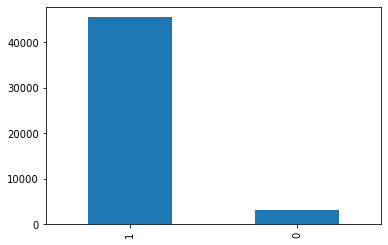

In [35]:
pd.value_counts(df_total.speaker).plot.bar()

In [44]:
df_total.text.describe()

count                         48739
unique                        47571
top       MAKE AMERICA GREAT AGAIN!
freq                             42
Name: text, dtype: object

In [46]:
df_total.to_pickle("../raw_data/tweet_pickles/trump_hill_merged.pickle")

### Pickle -> Preprocessed Data


* + tweet prerprocessing pacakge. Erase links, Emojis 
* ex)
* p.clean('Preprocessor is #awesome 👍 https://github.com/s/preprocessor')
* 'Preprocessor is'

In [50]:
import preprocessor as p

In [65]:
def to_lowercase(words):
    """Convert all characters to lowercase"""
    new_words = words.lower()
    return new_words

def remove_punctuation(words):
    """Remove punctuation"""
    new_words = re.sub(r'[^\w\s]', '', words)
    return new_words

def replace_contractions(text):
    """Replace contractions in string of text""" 
    return contractions.fix(text)

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text) # for removing [Hook], [Verse 1]

def side_strip(text):
    text = text.lstrip()
    text = text.rstrip()
    return text

def tweet_preprocessing(texts):
    texts = p.clean(texts)
    texts = to_lowercase(texts)
    texts = remove_between_square_brackets(texts)
    texts = remove_punctuation(texts)
    texts = replace_contractions(texts)
    texts = side_strip(texts)
    
    return texts

In [65]:
pickle_fname = "/trump_hill.pickle"
df_temp = pd.read_pickle("../raw_data/tweet_pickles"+pickle_fname)

# Using Tweeter preprocesser
print("Original", df_temp.text[0])
print("Preprocessed", p.clean(df_temp.text[0]))

df_temp['cleaned_text'] = df_temp.text.apply(lambda x :tweet_preprocessing(x))

df_temp.columns = ['score','text','review']
list_dict = df_temp[['score','review']].to_dict('records')
random.shuffle(list_dict)

total_len = len(list_dict) 
train_len = int(total_len * 0.7)
valid_len = int(total_len * 0.2)

train_data = list_dict[:train_len]
valid_data = list_dict[train_len : train_len + valid_len]
test_data =  list_dict[train_len + valid_len : ]


fname = 'preprocessed_tweets'
train_path = '../data/{}/train'.format(fname)
valid_path = '../data/{}/valid'.format(fname)
test_path =  '../data/{}/test'.format(fname)

if not os.path.exists('../data/'+fname): os.mkdir('../data/'+fname)
if not os.path.exists(train_path): os.mkdir(train_path)
if not os.path.exists(valid_path): os.mkdir(valid_path)
if not os.path.exists(test_path): os.mkdir(test_path)

with open(train_path+"/train.txt","w") as file:
    for i in range(len(train_data)) : 
        temp = train_data[i]
        temp = json.dumps(ast.literal_eval(str(temp)))
        file.write(str(temp) + '\n')
    
with open(valid_path+"/valid.txt","w") as file:
    for i in range(len(valid_data)) : 
        temp = valid_data[i]
        temp = json.dumps(ast.literal_eval(str(temp)))
        file.write(str(temp) + '\n')
        
with open(test_path+"/test.txt", "w") as file :
    for i in range(len(test_data)):
        temp = test_data[i]
        temp = json.dumps(ast.literal_eval(str(temp)))
        file.write(str(temp) + '\n')
        
    

In [129]:
pickle_fname = "/trump_hill_merged.pickle"
fname = 'merged_preprocessed_tweets'

df_temp = pd.read_pickle("../raw_data/tweet_pickles"+pickle_fname)

# Using Tweeter preprocesser
print("Original", df_temp.text.iloc[0])
print("Preprocessed", p.clean(df_temp.text.iloc[0]))

df_temp['cleaned_text'] = df_temp.text.apply(lambda x :tweet_preprocessing(x))

df_temp.columns = ['score','text','review']
list_dict = df_temp[['score','review']].to_dict('records')
random.shuffle(list_dict)

total_len = len(list_dict) 
train_len = int(total_len * 0.7)
valid_len = int(total_len * 0.2)

train_data = list_dict[:train_len]
valid_data = list_dict[train_len : train_len + valid_len]
test_data =  list_dict[train_len + valid_len : ]


train_path = '../data/{}/train'.format(fname)
valid_path = '../data/{}/valid'.format(fname)
test_path =  '../data/{}/test'.format(fname)

if not os.path.exists('../data/'+fname): os.mkdir('../data/'+fname)
if not os.path.exists(train_path): os.mkdir(train_path)
if not os.path.exists(valid_path): os.mkdir(valid_path)
if not os.path.exists(test_path): os.mkdir(test_path)

with open(train_path+"/train.txt","w") as file:
    for i in range(len(train_data)) : 
        temp = train_data[i]
        temp = json.dumps(ast.literal_eval(str(temp)))
        file.write(str(temp) + '\n')
    
with open(valid_path+"/valid.txt","w") as file:
    for i in range(len(valid_data)) : 
        temp = valid_data[i]
        temp = json.dumps(ast.literal_eval(str(temp)))
        file.write(str(temp) + '\n')
        
with open(test_path+"/test.txt", "w") as file :
    for i in range(len(test_data)):
        temp = test_data[i]
        temp = json.dumps(ast.literal_eval(str(temp)))
        file.write(str(temp) + '\n')
        
    

Original 0    Be sure to tune in and watch Donald Trump on L...
0    The question in this election: Who can put the...
Name: text, dtype: object
Preprocessed Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!
